# Libraries

In [1]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import os
import string
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## **i)** 
- **Use cosine similarity to determine which senator's speech is closest to Senator Biden's. Describe your findings.**
- **Make sure to describe your text preprocessing and justify your choices.**
- **Validate your findings using 'sen105kh_fix.csv' and/or Wikipedia to see if the most similar speeches belong to senators from the same state and/or party.**

# Biden Speech

In [2]:
# Path to file
biden_speech = "../Assignment/105-extracted-date/105-biden-de.txt"

# Get speech content
with open(biden_speech, "r", encoding='iso-8859-1') as file:
    content = file.read()

# Exclude first empty row
speeches = content.split("<DOC>")[1:]

# Reverse list, oldest first
speeches.reverse()

In [3]:
# Function for extracting text
def extract_content(text):
    start_index = text.find('<TEXT>') + len('<TEXT>')
    end_index = text.find('</TEXT>')
    
    return text[start_index:end_index].strip().replace('\n', '')

# Extract content from speeches
Extracted_content = [extract_content(speech) for speech in speeches]

senators_speeches = {}

# Put Biden's speech first in dictionary
senators_speeches["105-biden-de.txt"] = " ".join(Extracted_content)

# Get other senator's speeches into a list

In [4]:
for senator_data in os.listdir("../Assignment/105-extracted-date"):
    
    # Skip biden's speech
    if senator_data == "105-biden-de.txt":
        continue
    
    current_person = str("../Assignment/105-extracted-date/" + senator_data)
    
    # Get speeches
    with open(current_person, "r", encoding='iso-8859-1') as file:
        content = file.read()

    speeches = content.split("<DOC>")[1:]

    speeches.reverse()
    
    # Content extractor
    Extracted_content = [extract_content(speech) for speech in speeches]
    
    # Put senator's speech in to the list
    senators_speeches[senator_data] = " ".join(Extracted_content)

In [5]:
# make a list for the keys and speeches
keys = []
senators = []

for key, value in senators_speeches.items():
    keys.append(key)
    senators.append(value)

# Similarity - Lemmatization

In [6]:
string.punctuation
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

# Function for text preprocessing
def text_preprocesser(text):
    #text= re.sub(r'\W',' ', text)
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in (stop_words or string.punctuation)]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [word for word in tokens if len(word)>=3]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 

In [7]:
# Vectorizer
tfidf_vectorizer = TfidfVectorizer(preprocessor=text_preprocesser)

tfidf = tfidf_vectorizer.fit_transform(senators)

In [8]:
# Put in a dataframe
df = pd.DataFrame(tfidf.toarray().transpose(), index = tfidf_vectorizer.get_feature_names_out(), columns = keys)

df

,105-biden-de.txt,105-roth-de.txt,105-sessions-al.txt,105-bingaman-nm.txt,105-murray-wa.txt,105-burns-mt.txt,105-lieberman-ct.txt,105-specter-pa.txt,105-enzi-wy.txt,105-helms-nc.txt,...,105-durbin-il.txt,105-warner-va.txt,105-lott-ms.txt,105-harkin-ia.txt,105-snowe-me.txt,105-coverdell-ga.txt,105-wellstone-mn.txt,105-gramm-tx.txt,105-faircloth-nc.txt,105-gregg-nh.txt
00,0.000227,0.004273,0.002395,0.001192,0.000000,0.002888,0.000000,0.001232,0.00050,0.001826,...,0.000268,0.002259,0.001753,0.000251,0.003022,0.006633,0.000137,0.00000,0.000567,0.003786
000,0.020221,0.031505,0.042007,0.041523,0.028908,0.020374,0.036105,0.047698,0.02709,0.282396,...,0.040504,0.010339,0.004325,0.037871,0.051702,0.039374,0.041451,0.06233,0.069216,0.026854
0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
0002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
0004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zvi,0.000000,0.001227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
zwierzchowski,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
zygmunt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
zygote,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [9]:
similar_words = []

# df.columns[0] is the first speech (the base) 
# df.columns[i-1] is the reamaining speeches 
for i in range(2, df.shape[1]+1):
    similar_words.append(cosine_similarity(df[df.columns[0]].values.reshape(1, -1), df[df.columns[i-1]].values.reshape(1, -1)))

# Get values from array
similar_words = [array[0, 0] for array in similar_words]

# Max similarity value
max(similar_words)

0.82977987901043

In [10]:
similar_words_lemmatization = pd.DataFrame(similar_words, index = [i for i in keys[1:]], columns = ["Lemmatization"])

similar_words_lemmatization

,Lemmatization
105-roth-de.txt,0.748490
105-sessions-al.txt,0.790992
105-bingaman-nm.txt,0.792132
105-murray-wa.txt,0.696141
105-burns-mt.txt,0.757776
...,...
105-coverdell-ga.txt,0.744060
105-wellstone-mn.txt,0.766566
105-gramm-tx.txt,0.697001
105-faircloth-nc.txt,0.741096


# Similarity - Stemming

In [11]:
stemmer = LancasterStemmer()

def text_preprocesser(text):
    #text= re.sub(r'\W',' ', text)
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in (stop_words or string.punctuation)]
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [word for word in tokens if len(word)>=3]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 


In [12]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=text_preprocesser)

tfidf = tfidf_vectorizer.fit_transform(senators)

In [13]:
df = pd.DataFrame(tfidf.toarray().transpose(), index = tfidf_vectorizer.get_feature_names_out(), columns = keys)

df

,105-biden-de.txt,105-roth-de.txt,105-sessions-al.txt,105-bingaman-nm.txt,105-murray-wa.txt,105-burns-mt.txt,105-lieberman-ct.txt,105-specter-pa.txt,105-enzi-wy.txt,105-helms-nc.txt,...,105-durbin-il.txt,105-warner-va.txt,105-lott-ms.txt,105-harkin-ia.txt,105-snowe-me.txt,105-coverdell-ga.txt,105-wellstone-mn.txt,105-gramm-tx.txt,105-faircloth-nc.txt,105-gregg-nh.txt
00,0.000207,0.003959,0.002196,0.001084,0.000000,0.002618,0.00000,0.001093,0.000456,0.001831,...,0.000246,0.002075,0.001568,0.000229,0.002693,0.006210,0.000128,0.000000,0.000526,0.003455
000,0.018484,0.029189,0.038521,0.037746,0.026531,0.018473,0.03237,0.042321,0.024714,0.283224,...,0.037183,0.009496,0.003868,0.034557,0.046078,0.036864,0.038824,0.056693,0.064168,0.024510
0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zvi,0.000000,0.001137,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zwierzchowsk,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zygmunt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zygot,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
similar_words = []

for i in range(2, df.shape[1]+1):
    similar_words.append(cosine_similarity(df[df.columns[0]].values.reshape(1, -1), df[df.columns[i-1]].values.reshape(1, -1)))

similar_words = [array[0, 0] for array in similar_words]

max(similar_words)

0.8573740414768223

In [15]:
# Make another df for Stemming
similar_words_stemming = pd.DataFrame(similar_words, index = [i for i in keys[1:]], columns = ["Stemming"])

similar_words_stemming

,Stemming
105-roth-de.txt,0.787732
105-sessions-al.txt,0.823108
105-bingaman-nm.txt,0.828888
105-murray-wa.txt,0.752871
105-burns-mt.txt,0.798824
...,...
105-coverdell-ga.txt,0.779983
105-wellstone-mn.txt,0.800700
105-gramm-tx.txt,0.717185
105-faircloth-nc.txt,0.771749


## **iii)** 
- **Create at least two visualizations to support your analysis.**

In [16]:
# Merge 2 dfs
Merge_df = pd.concat([similar_words_lemmatization,similar_words_stemming], axis = 1)

# Make new column to see difference
Merge_df["difference"] = Merge_df["Stemming"] - Merge_df["Lemmatization"]

Merge_df

,Lemmatization,Stemming,difference
105-roth-de.txt,0.748490,0.787732,0.039241
105-sessions-al.txt,0.790992,0.823108,0.032115
105-bingaman-nm.txt,0.792132,0.828888,0.036757
105-murray-wa.txt,0.696141,0.752871,0.056729
105-burns-mt.txt,0.757776,0.798824,0.041048
...,...,...,...
105-coverdell-ga.txt,0.744060,0.779983,0.035923
105-wellstone-mn.txt,0.766566,0.800700,0.034134
105-gramm-tx.txt,0.697001,0.717185,0.020184
105-faircloth-nc.txt,0.741096,0.771749,0.030653


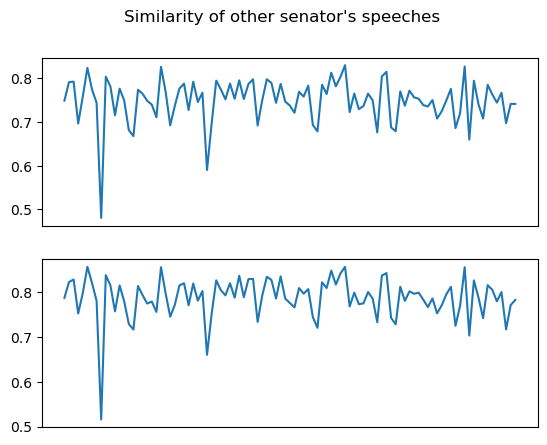

In [17]:
fig, axs = plt.subplots(2)
fig.suptitle("Similarity of other senator's speeches")
axs[0].plot(Merge_df["Lemmatization"]) # Graph above
axs[1].plot(Merge_df["Stemming"]) # Graph below
for ax in axs:
    ax.set_xticks([])
plt.show()

**Note:**
The graphs look nearly identical for Lemmatization and Stemming 

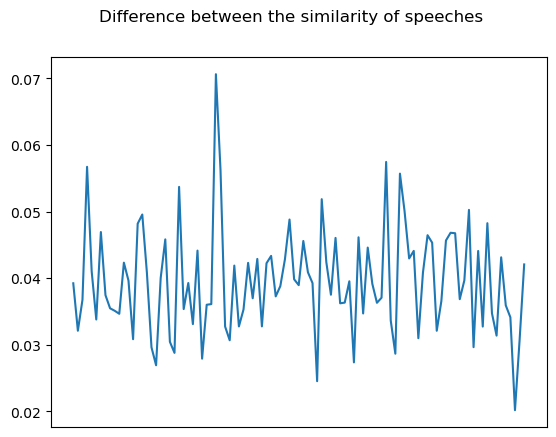

In [18]:
plt.suptitle("Difference between the similarity of speeches")
plt.plot(Merge_df["difference"])
plt.xticks([])
plt.show()

In [19]:
# Findings
Merge_df.idxmax()

Lemmatization      105-roberts-ks.txt
Stemming         105-lieberman-ct.txt
difference           105-akaka-hi.txt
dtype: object

## **Answer to part i)** 

**Cosine Similarity Findings and Justification:**
I processed speeches using TF-IDF vectorization and calculated cosine similarity to find the senator whose speeches are closest to Senator Biden's. 

**For preprocessing**, I converted the text to lowercase, tokenized it, removed stopwords and punctuation, applied lemmatization, and filtered out short words. This approach helps in reducing noise and focuses on the meaningful content in the text.

**Justification for Preprocessing Choices:**
- Lowercasing ensures that the same words in different cases are not counted as different tokens.
- Tokenization breaks text into individual words which can be analyzed.
- Stopword Removal gets rid of common words that don't carry much meaning.
- Punctuation Removal helps in focusing on the words rather than formatting.
- Lemmatization considers the context and converts words to their base form, which is better for capturing the meaning compared to stemming.
- Filtering Short Words removes tokens that are often not meaningful and could be artifacts of the tokenization process.

Later, I validate my findings by checking if the senator with the most similar speech to Biden's is from the same state or party, as one could hypothesize that senators from the same region or political party might discuss similar topics or use similar rhetoric, which could be reflected in the similarity of their speeches.

**Do the most similar speeches belong to senators from the same state and/or party?**

Two distinct patterns emerge:

In the case of **lemmatization**, Senator Pat Robert's (Republican) speeches exhibit the highest similarity. 
Conversely, when **stemming** is applied, Senator Joe Lieberman's (Democratic) speeches demonstrate the closest resemblance.

## **ii)** 
- **How do your results change if you apply stemming or lemmatization? In your opinion, which is better to apply: stemming or lemmatization? Why?**

The change in preprocessing from lemmatization to stemming involves the method used to reduce words to their base or root form. Stemming usually chops off word endings based on common prefixes and suffixes, which can sometimes lead to incorrect word forms but is computationally less intensive. Lemmatization, on the other hand, uses a vocabulary and morphological analysis to get the correct base forms of words, which is more accurate but computationally more demanding.

**Which is Better?**
- Lemmatization is generally better for tasks where the meaning of words (semantic information) is important. It's more suitable for understanding the context of the speech.
- Stemming may be better when the computational cost is an issue or when the exact form of a word is less important.

The results of cosine similarity may change with stemming because the stemmed forms of the words may group different words together or separate words that lemmatization would consider equivalent. For example, "democracy" and "democratic" would be reduced to a common stem by stemming but may be considered different by lemmatization unless the context indicates they should be the same.

In political speeches, where the context and precise use of words are likely important, lemmatization could provide more accurate results. However, this could be empirically tested by comparing the cosine similarity scores and seeing which method provides similarity scores that better match known political alignments or speech content.

Given the nature of the task, which involves understanding nuanced political language, lemmatization would likely be the more suitable method. It would preserve more of the semantic meaning of the speeches, which is likely important for capturing the subtleties in how different political parties or senators express their ideas.


## **iv)** 
- **Use 'sen105kh_fix.csv' as the target variable for your predictions. Can you predict the party of the senator from their speech? Should you use the same text preprocessing as above? Justify your choices.**

In [20]:
base = pd.read_csv("../Assignment/sen105kh_fix.csv", sep = ";")
base["party"].replace(200, "Rep", inplace = True)
base["party"].replace(100, "Dem", inplace = True)
base["filename"] = base["cong"].astype(str) + "-" + base["lname"] + "-" + base["stateab"] + ".txt"
base = base.sort_values(by = ["lname"])
base = base.reset_index().drop(columns=["index"])

# Move Biden upwards
row_to_move = base.iloc[6:7]
base = base.drop(row_to_move.index)
base = pd.concat([row_to_move, base], ignore_index=True)

# Put in speeches
base["speeches"] = senators

base

,cong,lname,stateab,lstate,id,dist,party,filename,speeches
0,105,biden,de,DELAWAR,14101,0,Dem,105-biden-de.txt,"Mr. BIDEN. Mr. President, today I rise to intr..."
1,105,abraham,mi,MICHIGA,49500,0,Rep,105-abraham-mi.txt,"Mr. ROTH. Mr. President, the comedian Henny Yo..."
2,105,akaka,hi,HAWAII,14400,0,Dem,105-akaka-hi.txt,"Mr. SESSIONS. Madam President, I have listened..."
3,105,allard,co,COLORAD,29108,0,Rep,105-allard-co.txt,"Mr. BINGAMAN. Madam President, I was very plea..."
4,105,ashcroft,mo,MISSOUR,49501,0,Rep,105-ashcroft-mo.txt,Mrs. MURRAY. I suggest the absence of a quorum...
...,...,...,...,...,...,...,...,...,...
95,105,thurmond,sc,SOUTH C,9369,0,Rep,105-thurmond-sc.txt,"Mr. COVERDELL. Mr. President, for people to re..."
96,105,torricelli,nj,NEW JER,15071,0,Dem,105-torricelli-nj.txt,"Mr. WELLSTONE. Mr. President, I have listened ..."
97,105,warner,va,VIRGINI,14712,0,Rep,105-warner-va.txt,"Mr. GRAMM. Mr. President, in 1965, 5.7 percent..."
98,105,wellstone,mn,MINNESO,49101,0,Dem,105-wellstone-mn.txt,"Mr. FAIRCLOTH. Mr. President, I am pleased to ..."


In [21]:
stopwords=[element.replace("\n", "") for element in stop_words]

In [22]:
# Preprocesser back to lemmatization

# Function for text preprocessing
def text_preprocesser(text):
    #text= re.sub(r'\W',' ', text)
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in (stop_words or string.punctuation)]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [word for word in tokens if len(word)>=3]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 

In [23]:
# split data
spch_train, spch_test, prt_train, prt_test = train_test_split(base['speeches'], base['party'], test_size=0.2, random_state=42, stratify=base['party'])

In [24]:
# create pipeline
pipeline = Pipeline([
    ('count', CountVectorizer(preprocessor = text_preprocesser)),  # integer counts 
    ('classifier', MultinomialNB()),  #Naive Bayes classifier
])

In [25]:
#Now we can directly pass message text data and the pipeline will do our pre-processing for us!
pipeline.fit(spch_train, prt_train)
predictions = pipeline.predict(spch_test)

In [26]:
predictions

array(['Dem', 'Rep', 'Rep', 'Dem', 'Dem', 'Dem', 'Rep', 'Dem', 'Dem',
       'Rep', 'Rep', 'Rep', 'Rep', 'Dem', 'Rep', 'Dem', 'Rep', 'Dem',
       'Rep', 'Rep'], dtype='<U3')

In [27]:
from sklearn.metrics import classification_report
print (classification_report(prt_test,  predictions))

              precision    recall  f1-score   support

         Dem       0.44      0.44      0.44         9
         Rep       0.55      0.55      0.55        11

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20



**Can you predict the party of the senator from their speech?**

- Yes, it is possible to predict the party of a senator from their speech using the methods I've applied. The Multinomial Naive Bayes classifier has been used with a text preprocessing pipeline and trained on the dataset. The model has made predictions, as evidenced by the array of 'Dem' and 'Rep' values.

- The classification report shows that the model has an accuracy of 0.50, meaning it correctly predicts the party affiliation for half of the speeches in the test set. However, this level of accuracy indicates that the model's predictions are equivalent to random guessing in a balanced dataset with two classes.

**Should you use the same text preprocessing as part (i) of your assignment? Justify your choices.**
- The text preprocessing steps I've used in part (i), which included lowercasing, removing stopwords and punctuation, and lemmatization, are generally suitable for text classification tasks and have been used here as well.
   
- Whether to use the same preprocessing steps depends on the specific task and the performance of the model. For cosine similarity calculations, the goal is to find the most similar texts, for which preserving more of the language's nuance through lemmatization might be beneficial. In contrast, for classification tasks like predicting party affiliation, you might need to adjust preprocessing based on what features are most predictive of the target variable.
   
- In this case, the classification results suggest that there is room for improvement in the preprocessing steps. For instance, including more linguistic features such as bigrams, trigrams, or sentiment analysis might capture nuances in the data that are indicative of party affiliation. It might also be worth evaluating the impact of the stopwords list—is it removing words that could be significant predictors? Are there any domain-specific terms that should be preserved?
   
- Given the accuracy is quite low, it would be wise to reevaluate the preprocessing steps. You could experiment with different configurations of the text preprocessing pipeline and compare the performance of the classifier under those various settings. This could include comparing lemmatization with stemming, adjusting the list of stopwords, or experimenting with including named entity recognition to see if certain proper nouns or organizations are predictive of party affiliation.

The overall goal is to enhance the model's ability to capture key patterns in the text data that are predictive of party affiliation, which might be lost or obscured with too aggressive preprocessing. Therefore, it might be necessary to iterate on your preprocessing strategy to improve the model's predictive performance.

## **v)** 
- **Write a Medium article summarizing your findings. This article should be written with a general audience in mind. The best articles may be invited for submission to [CEU Economic Threads](https://medium.com/ceu-economic-threads).**


Link to article: https://sageinkwell.medium.com/biden-deciphered-a-breakdown-of-100-senators-speech-patterns-681db0e85203